#2차시 과제2번 풀이

## 게임과 성적에 대한 데이터

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
#데이터 불러오기
gamegrade_df = pd.read_csv('/content/drive/MyDrive/gameandgrade.csv')


# 데이터 구조 확인
gamegrade_df.info(), gamegrade_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               770 non-null    int64 
 1   School Code       770 non-null    int64 
 2   Playing Years     770 non-null    int64 
 3   Playing Often     770 non-null    int64 
 4   Playing Hours     770 non-null    int64 
 5   Playing Games     770 non-null    int64 
 6   Parent Revenue    770 non-null    int64 
 7   Father Education  770 non-null    int64 
 8   Mother Education  770 non-null    int64 
 9   Grade             770 non-null    object
dtypes: int64(9), object(1)
memory usage: 60.3+ KB


(None,
    Sex  School Code  Playing Years  Playing Often  Playing Hours  \
 0    0            1              1              2              1   
 1    1            1              1              3              1   
 2    0            1              0              0              0   
 3    0            1              3              5              1   
 4    1            1              1              1              2   
 
    Playing Games  Parent Revenue  Father Education  Mother Education  Grade  
 0              1               4                 4                 5  77.50  
 1              1               1                 3                 3  83.00  
 2              0               1                 3                 3  80.00  
 3              1               2                 2                 3  45.00  
 4              1               1                 3                 4  85.00  )

In [6]:
# 1. 성별(Sex) 별 평균 성적 분석
# 'Grade' 열을 숫자형으로 변환, 오류 발생 시 NaN으로 처리
gamegrade_df['Grade'] = pd.to_numeric(gamegrade_df['Grade'], errors='coerce')
average_grade_by_gender = gamegrade_df.groupby('Sex')['Grade'].mean().round(2)

# 2. 게임 플레이 시간(Playing Hours) 별 평균 성적
average_grade_by_hours = gamegrade_df.groupby('Playing Hours')['Grade'].mean().round(2)

# 3. 부모 수입(Parent Revenue) 수준별 평균 성적
average_grade_by_income = gamegrade_df.groupby('Parent Revenue')['Grade'].mean().round(2)

# 결과 정리
result2 = {
    "성별 평균 성적 (0: 남자, 1: 여자)": average_grade_by_gender.to_dict(),
    "게임 플레이 시간별 평균 성적": average_grade_by_hours.to_dict(),
    "부모 수입 수준별 평균 성적": average_grade_by_income.to_dict()
}

result2

{'성별 평균 성적 (0: 남자, 1: 여자)': {0: 79.71, 1: 75.29},
 '게임 플레이 시간별 평균 성적': {0: 81.46,
  1: 77.44,
  2: 75.23,
  3: 75.75,
  4: 72.8,
  5: 72.34},
 '부모 수입 수준별 평균 성적': {0: 95.97, 1: 68.81, 2: 75.24, 3: 78.9, 4: 85.68}}

## 성별에 따른 평균 성적

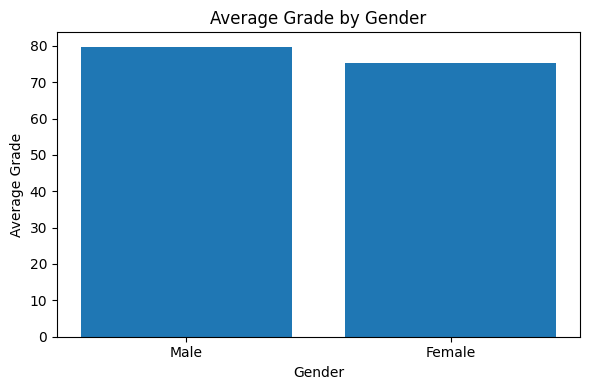

In [ ]:
# 성적 열(Grade)을 수치형으로 변환 (문자열 포함 가능성 대비)
gamegrade_df['Grade'] = pd.to_numeric(gamegrade_df['Grade'], errors='coerce')

# 1. 성별에 따른 평균 성적 계산
gender_grade = gamegrade_df.groupby('Sex')['Grade'].mean()

# 시각화
plt.figure(figsize=(6, 4))
plt.bar(['Male', 'Female'], gender_grade.values)
plt.title('Average Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Grade')
plt.tight_layout()
plt.show()

Female 학생의 평균 성적이 Male보다 더 높게 나타남

성별에 따른 게임 습관이나 생활 습관이 학업에 영향을 줄 수 있다는 단서를 줄 수 있습니다.

## 게임 빈도(Playing Often)별 평균 성적 계산

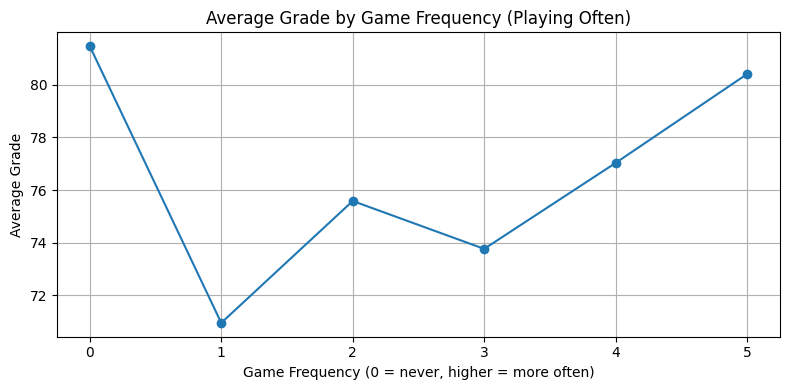

In [ ]:
# 2. 게임 빈도(Playing Often)별 평균 성적 계산
often_grade = gamegrade_df.groupby('Playing Often')['Grade'].mean()

# 시각화
plt.figure(figsize=(8, 4))
plt.plot(often_grade.index, often_grade.values, marker='o')
plt.title('Average Grade by Game Frequency (Playing Often)')
plt.xlabel('Game Frequency (0 = never, higher = more often)')
plt.ylabel('Average Grade')
plt.grid(True)
plt.tight_layout()
plt.show()


게임을 아주 자주 하는 학생들(Playing Often 값이 높을수록)은 평균 성적이 낮은 경향이 있습니다.

적절한 게임은 괜찮지만, 지나친 게임 빈도는 성적에 부정적 영향을 줄 수 있음을 시사합니다.



## 하루 평균 게임 시간(Playing Hours)별 평균 성적 계산

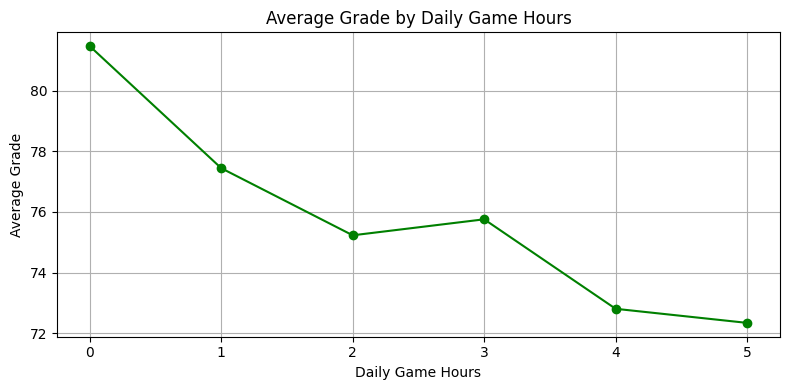

In [ ]:
# 3. 하루 평균 게임 시간(Playing Hours)별 평균 성적 계산
hours_grade = gamegrade_df.groupby('Playing Hours')['Grade'].mean()

# 시각화
plt.figure(figsize=(8, 4))
plt.plot(hours_grade.index, hours_grade.values, marker='o', color='green')
plt.title('Average Grade by Daily Game Hours')
plt.xlabel('Daily Game Hours')
plt.ylabel('Average Grade')
plt.grid(True)
plt.tight_layout()
plt.show()


하루에 게임을 더 오래 할수록 평균 성적이 감소하는 경향이 뚜렷하게 나타납니다.

특히 게임 시간을 3시간 이상 하는 그룹의 성적이 급격히 낮아짐을 확인할 수 있습니다.

## 부모 교육 수준별 평균 성적 계산

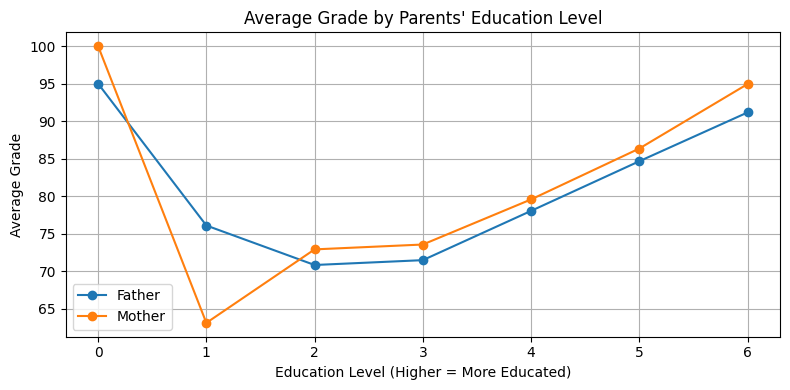

In [ ]:
# 4. 부모 교육 수준별 평균 성적 계산
father_grade = gamegrade_df.groupby('Father Education')['Grade'].mean()
mother_grade = gamegrade_df.groupby('Mother Education')['Grade'].mean()

# 시각화 - 아버지 교육 수준
plt.figure(figsize=(8, 4))
plt.plot(father_grade.index, father_grade.values, marker='o', label='Father')
plt.plot(mother_grade.index, mother_grade.values, marker='o', label='Mother')
plt.title('Average Grade by Parents\' Education Level')
plt.xlabel('Education Level (Higher = More Educated)')
plt.ylabel('Average Grade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


부모의 교육 수준이 높을수록 자녀의 평균 성적도 높아지는 경향이 뚜렷합니다.

특히 어머니의 교육 수준이 성적에 더 큰 영향을 미치는 듯한 패턴도 관찰됩니다.

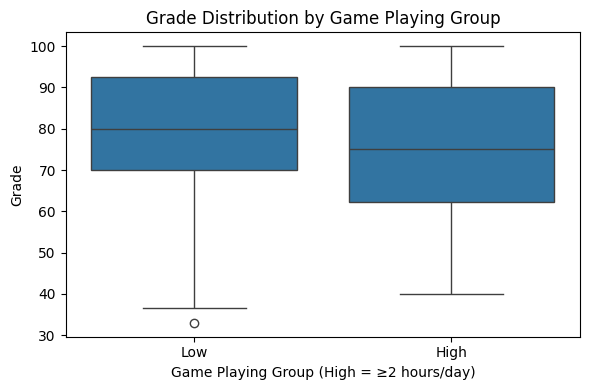

In [ ]:
import seaborn as sns

# 5. 게임 많이 하는 그룹 vs 적게 하는 그룹
# 기준: 하루 2시간 이상이면 '많이 함', 아니면 '적게 함'
gamegrade_df['Play Group'] = gamegrade_df['Playing Hours'].apply(lambda x: 'High' if x >= 2 else 'Low')

# 시각화 - 박스플롯
plt.figure(figsize=(6, 4))
sns.boxplot(x='Play Group', y='Grade', data=gamegrade_df)
plt.title('Grade Distribution by Game Playing Group')
plt.xlabel('Game Playing Group (High = ≥2 hours/day)')
plt.ylabel('Grade')
plt.tight_layout()
plt.show()


**게임을 많이 하는 그룹(High)**은 전반적으로 성적 분포가 낮고, **이상치(outlier)**도 많습니다.

반면 **적게 하는 그룹(Low)**은 성적의 중앙값도 높고, 성적의 일관성도 더 뛰어남을 볼 수 있습니다.